In [1]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import numpy as np

In [2]:
def filled_df_except_miss_col(df_with_null, miss_col):
    knn_imputer = KNNImputer()
    df_filled = knn_imputer.fit_transform(df_with_null.copy())
    df_filled_except_miss_col = pd.DataFrame(df_filled, columns=df_with_null.columns)
    df_filled_except_miss_col[miss_col] = df_with_null[miss_col]
    return df_filled_except_miss_col


def fill_with_model(df_with_null, miss_col, model):
    """
    Fill the missing values with the model
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    # print(df_with_null.isnull().sum(), miss_col)
    df_filled_except_miss_col = filled_df_except_miss_col(df_with_null, miss_col)
    # print(df_filled_except_miss_col.isnull().sum(), miss_col)

    train_df = df_filled_except_miss_col.dropna()
    X_train = train_df.drop(miss_col, axis=1)
    y_train = train_df[miss_col]

    model.fit(X_train, y_train)

    miss_index = df_with_null[df_with_null[miss_col].isnull()].index

    predict_X = df_filled_except_miss_col.loc[miss_index].drop(miss_col, axis=1)

    predict_y = model.predict(predict_X)

    df_filled = df_with_null.copy()
    df_filled.loc[miss_index, miss_col] = predict_y
    df_filled_all = df_filled_except_miss_col.copy()
    df_filled_all.loc[miss_index, miss_col] = predict_y
    return df_filled, df_filled_all

def fill_with_et(df_with_null, miss_col):
    """
    Fill the missing values with extra tree
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    et = ExtraTreesRegressor()
    return fill_with_model(df_with_null, miss_col, et)

In [3]:
def filled_df_except_miss_col_with_mean(df_with_null, miss_col):
    mean_imputer = SimpleImputer(strategy='mean')
    df_filled = mean_imputer.fit_transform(df_with_null.copy())
    df_filled_except_miss_col = pd.DataFrame(df_filled, columns=df_with_null.columns)
    df_filled_except_miss_col[miss_col] = df_with_null[miss_col]
    return df_filled_except_miss_col


def fill_with_model_with_mean(df_with_null, miss_col, model):
    """
    Fill the missing values with the model
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    df_filled_except_miss_col = filled_df_except_miss_col_with_mean(df_with_null, miss_col)

    train_df = df_filled_except_miss_col.dropna()
    X_train = train_df.drop(miss_col, axis=1)
    y_train = train_df[miss_col]

    model.fit(X_train, y_train)

    miss_index = df_with_null[df_with_null[miss_col].isnull()].index

    predict_X = df_filled_except_miss_col.loc[miss_index].drop(miss_col, axis=1)

    predict_y = model.predict(predict_X)

    df_filled = df_with_null.copy()
    df_filled.loc[miss_index, miss_col] = predict_y
    df_filled_all = df_filled_except_miss_col.copy()
    df_filled_all.loc[miss_index, miss_col] = predict_y
    return df_filled, df_filled_all

def fill_with_et_with_mean(df_with_null, miss_col):
    """
    Fill the missing values with extra tree
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    et = ExtraTreesRegressor()
    return fill_with_model_with_mean(df_with_null, miss_col, et)

In [4]:
def filled_df_except_miss_col_with_median(df_with_null, miss_col):
    imputer = SimpleImputer(strategy='median')
    df_filled = imputer.fit_transform(df_with_null.copy())
    df_filled_except_miss_col = pd.DataFrame(df_filled, columns=df_with_null.columns)
    df_filled_except_miss_col[miss_col] = df_with_null[miss_col]
    return df_filled_except_miss_col


def fill_with_model_with_median(df_with_null, miss_col, model):
    """
    Fill the missing values with the model
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    df_filled_except_miss_col = filled_df_except_miss_col_with_median(df_with_null, miss_col)

    train_df = df_filled_except_miss_col.dropna()
    X_train = train_df.drop(miss_col, axis=1)
    y_train = train_df[miss_col]

    model.fit(X_train, y_train)

    miss_index = df_with_null[df_with_null[miss_col].isnull()].index

    predict_X = df_filled_except_miss_col.loc[miss_index].drop(miss_col, axis=1)

    predict_y = model.predict(predict_X)

    df_filled = df_with_null.copy()
    df_filled.loc[miss_index, miss_col] = predict_y
    df_filled_all = df_filled_except_miss_col.copy()
    df_filled_all.loc[miss_index, miss_col] = predict_y
    return df_filled, df_filled_all

def fill_with_et_with_median(df_with_null, miss_col):
    """
    Fill the missing values with extra tree
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    et = ExtraTreesRegressor()
    return fill_with_model_with_median(df_with_null, miss_col, et)

In [5]:
def filled_df_except_miss_col_with_mostfreq(df_with_null, miss_col):
    imputer = SimpleImputer(strategy='most_frequent')
    df_filled = imputer.fit_transform(df_with_null.copy())
    df_filled_except_miss_col = pd.DataFrame(df_filled, columns=df_with_null.columns)
    df_filled_except_miss_col[miss_col] = df_with_null[miss_col]
    return df_filled_except_miss_col


def fill_with_model_with_mostfreq(df_with_null, miss_col, model):
    """
    Fill the missing values with the model
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    df_filled_except_miss_col = filled_df_except_miss_col_with_mostfreq(df_with_null, miss_col)

    train_df = df_filled_except_miss_col.dropna()
    X_train = train_df.drop(miss_col, axis=1)
    y_train = train_df[miss_col]

    model.fit(X_train, y_train)

    miss_index = df_with_null[df_with_null[miss_col].isnull()].index

    predict_X = df_filled_except_miss_col.loc[miss_index].drop(miss_col, axis=1)

    predict_y = model.predict(predict_X)

    df_filled = df_with_null.copy()
    df_filled.loc[miss_index, miss_col] = predict_y
    df_filled_all = df_filled_except_miss_col.copy()
    df_filled_all.loc[miss_index, miss_col] = predict_y
    return df_filled, df_filled_all

def fill_with_et_with_mostfreq(df_with_null, miss_col):
    """
    Fill the missing values with extra tree
    :param df_with_null: the dataframe with missing values
    :param miss_col: the column with missing values
    :return: the dataframe with missing values filled
    """
    et = ExtraTreesRegressor()
    return fill_with_model_with_mostfreq(df_with_null, miss_col, et)

In [6]:
from hyperimpute.plugins.utils.metrics import RMSE
from scipy.stats import wasserstein_distance

def ws_score(imputed: pd.DataFrame, ground: pd.DataFrame) -> pd.DataFrame:
    res = 0
    for col in range(ground.shape[1]):
        res += wasserstein_distance(
            np.asarray(ground)[:, col], np.asarray(imputed)[:, col]
        )
    return res



def with_knn(df,original_df,mask):
    rmse_scores = []
    wd_scores = []
    miss_rate = df.isnull().sum() / df.shape[0]
    cols = miss_rate.sort_values().index.tolist()
    cols = [col for col in cols if miss_rate[col] > 0]
    for col in cols:
        df_col_filled,df_all_filled = fill_with_et(df, col)
        wd = ws_score(df_all_filled, original_df)
        s = RMSE(np.asarray(df_all_filled), np.asarray(original_df), np.asarray(mask))
        rmse_scores.append(s)
        wd_scores.append(wd)
        df[col] = df_col_filled[col]
    return df,rmse_scores,wd_scores

def with_mean(df,original_df,mask):
    rmse_scores = []
    wd_scores = []
    miss_rate = df.isnull().sum() / df.shape[0]
    cols = miss_rate.sort_values().index.tolist()
    cols = [col for col in cols if miss_rate[col] > 0]
    for col in cols:
        df_col_filled, df_all_filled = fill_with_et_with_mean(df, col)
        s = RMSE(np.asarray(df_all_filled), np.asarray(original_df), np.asarray(mask))
        wd = ws_score(df_all_filled, original_df)
        rmse_scores.append(s)
        wd_scores.append(wd)
        df[col] = df_col_filled[col]
    return df,rmse_scores,wd_scores

def with_median(df,original_df,mask):
    rmse_scores = []
    wd_scores = []
    miss_rate = df.isnull().sum() / df.shape[0]
    cols = miss_rate.sort_values().index.tolist()
    cols = [col for col in cols if miss_rate[col] > 0]
    for col in cols:
        df_col_filled, df_all_filled = fill_with_et_with_median(df, col)
        s = RMSE(np.asarray(df_all_filled), np.asarray(original_df), np.asarray(mask))
        wd = ws_score(df_all_filled, original_df)
        rmse_scores.append(s)
        wd_scores.append(wd)
        df[col] = df_col_filled[col]
    return df,rmse_scores,wd_scores

def with_mostfreq(df,original_df,mask):
    rmse_scores = []
    wd_scores = []
    miss_rate = df.isnull().sum() / df.shape[0]
    cols = miss_rate.sort_values().index.tolist()
    cols = [col for col in cols if miss_rate[col] > 0]
    for col in cols:
        df_col_filled, df_all_filled = fill_with_et_with_mostfreq(df, col)
        s = RMSE(np.asarray(df_all_filled), np.asarray(original_df), np.asarray(mask))
        wd = ws_score(df_all_filled, original_df)
        rmse_scores.append(s)
        wd_scores.append(wd)
        df[col] = df_col_filled[col]
    return df,rmse_scores,wd_scores

In [7]:
df = pd.read_csv("dataset/PUE.csv")
df.drop(columns=['SSID', 'logEB', 'logYM', 'logTS'],inplace=True)
df

,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.557772,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,0.204080,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2,4,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2,2,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2,2,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.952921,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,0.177717,-0.651873,-1.206811,-0.174683,0.287152,0.569582
324,-0.464901,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,0.103863,0.193791,0.042658,0.833987,0.875190,0.194281,-0.651873,-1.206811,-0.193522,0.207951,0.625250


In [8]:
from hyperimpute.plugins.utils.simulate import simulate_nan
from tqdm import tqdm

all_rmse_scores = []
all_rmse_scores2 = []
all_rmse_scores3 = []
all_rmse_scores4 = []
all_wd_scores = []
all_wd_scores2 = []
all_wd_scores3 = []
all_wd_scores4 = []

np.random.seed(0)

for i in tqdm(range(10)):
    result = simulate_nan(df.values , 0.1, mecha="MCAR")
    X_ori = result['X_init']
    X_ori = pd.DataFrame(X_ori, columns=df.columns)
    X_incomplete = result['X_incomp']
    X_incomplete = pd.DataFrame(X_incomplete, columns=df.columns)
    mask = result['mask']
    filled_df,rmse_scores,wd_scores = with_knn(X_incomplete.copy(),X_ori,mask)
    filled_df2,rmse_scores2,wd_scores2 = with_mean(X_incomplete.copy(),X_ori,mask)
    filled_df3,rmse_scores3,wd_scores3 = with_median(X_incomplete.copy(),X_ori,mask)
    filled_df4,rmse_scores4,wd_scores4 = with_mostfreq(X_incomplete.copy(),X_ori,mask)

    all_rmse_scores.append(rmse_scores)
    all_rmse_scores2.append(rmse_scores2)
    all_rmse_scores3.append(rmse_scores3)
    all_rmse_scores4.append(rmse_scores4)
    all_wd_scores.append(wd_scores)
    all_wd_scores2.append(wd_scores2)
    all_wd_scores3.append(wd_scores3)
    all_wd_scores4.append(wd_scores4)


# average
all_rmse_scores = np.array(all_rmse_scores).mean(axis=0)
all_rmse_scores2 = np.array(all_rmse_scores2).mean(axis=0)
all_rmse_scores3 = np.array(all_rmse_scores3).mean(axis=0)
all_rmse_scores4 = np.array(all_rmse_scores4).mean(axis=0)
all_wd_scores = np.array(all_wd_scores).mean(axis=0)
all_wd_scores2 = np.array(all_wd_scores2).mean(axis=0)
all_wd_scores3 = np.array(all_wd_scores3).mean(axis=0)
all_wd_scores4 = np.array(all_wd_scores4).mean(axis=0)

100%|██████████| 10/10 [01:19<00:00,  7.93s/it]


In [11]:
# save the rmse scores

scores_rmse = [
    all_rmse_scores,
    all_rmse_scores2,
    all_rmse_scores3,
    all_rmse_scores4
]

scores_wd = [
    all_wd_scores,
    all_wd_scores2,
    all_wd_scores3,
    all_wd_scores4
]

np.save('results/scores_rmse.npy',scores_rmse)
np.save('results/scores_wd.npy',scores_wd)

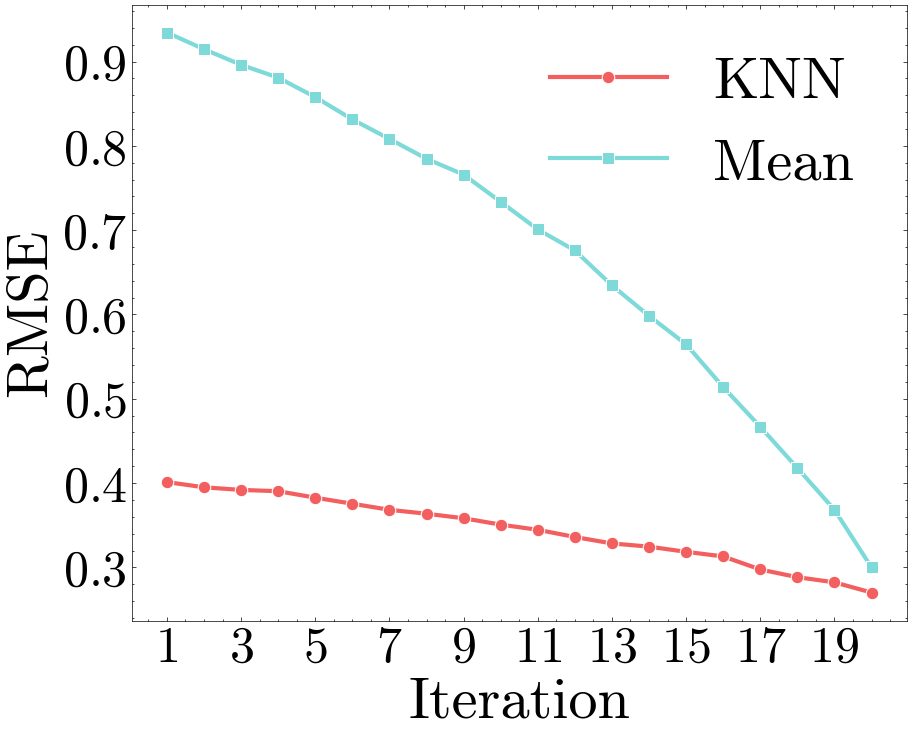

In [25]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns

plt.style.use(['science','no-latex'])

[rmse_scores,rmse_scores2,rmse_scores3,rmse_scores4] = np.load('results/scores_rmse.npy',allow_pickle=True)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1, len(rmse_scores)+1),y=rmse_scores,label='KNN',marker='o',markersize=9,linewidth=3, color="#F35F5F",)
sns.lineplot(x=range(1, len(rmse_scores2)+1),y=rmse_scores2,label='Mean',marker='s',markersize=9,linewidth=3, color="#7ED9D9")
# sns.lineplot(x=range(1,len(rmse_scores3)+1),y=rmse_scores3,label='Median',marker='^',markersize=9,linewidth=3, color="#9467BD")
# sns.lineplot(x=range(1,len(rmse_scores4)+1),y=rmse_scores4,label='Most Frequent',marker='d',markersize=9,linewidth=3, color="#FFC0D9")

plt.xlabel('Iteration',fontsize=42)
plt.ylabel('RMSE',fontsize=42)
plt.xticks(range(1,len(rmse_scores)+1, 2),fontsize=36)
plt.yticks(fontsize=36)
plt.legend(fontsize=42)
plt.savefig('results/strategy-rmse.png',dpi=300)

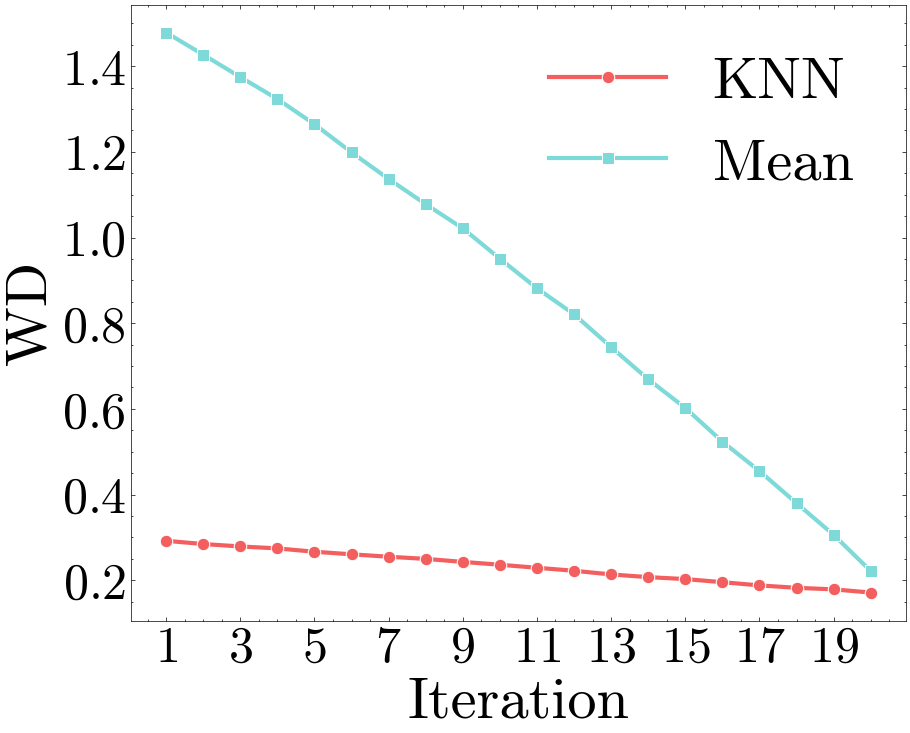

In [24]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns

[wd_scores,wd_scores2,wd_scores3,wd_scores4] = np.load('results/scores_wd.npy',allow_pickle=True)

plt.style.use(['science','no-latex'])

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,len(wd_scores)+1),y=wd_scores,label='KNN',marker='o',markersize=9,linewidth=3, color="#F35F5F",)
sns.lineplot(x=range(1,len(wd_scores2)+1),y=wd_scores2,label='Mean',marker='s',markersize=9,linewidth=3, color="#7ED9D9")
# sns.lineplot(x=range(1,len(wd_scores3)+1),y=wd_scores3,label='Median',marker='^',markersize=9,linewidth=3, color="#9467BD")
# sns.lineplot(x=range(1,len(wd_scores4)+1),y=wd_scores4,label='Most Frequent',marker='d',markersize=9,linewidth=3, color="#FFC0D9")

plt.xlabel('Iteration',fontsize=42)
plt.ylabel('WD',fontsize=42)
plt.xticks(range(1,len(rmse_scores)+1, 2),fontsize=36)
plt.yticks(fontsize=36)
plt.legend(fontsize=42)
plt.savefig('results/strategy-wd.png',dpi=300)